# Numerical SDEs in Python

This notebook contains Python translations of some of the files listed on [Professor Higham's website](http://personal.strath.ac.uk/d.j.higham/algfiles.html)

## _bpath1.m_

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T = 1
N = 500
dt = T/N
dW = np.zeros(N)
W = np.zeros(N)

dW[0] = np.sqrt(dt)*np.random.normal()
W[0] = dW[0]

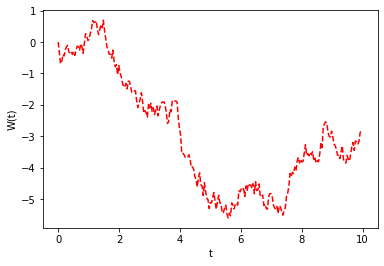

In [11]:
plt.ion()
np.random.seed(seed=100)
for j in range(1,N):
    dW[j] = np.sqrt(dt)*np.random.normal()
    W[j] = W[j-1] + dW[j]

plt.plot(np.arange(0.0,T+dt,dt),np.concatenate([[0], W]), 'r--')
plt.xlabel('t')
plt.ylabel('W(t)')

plt.show()
        

## _bpath2.m_

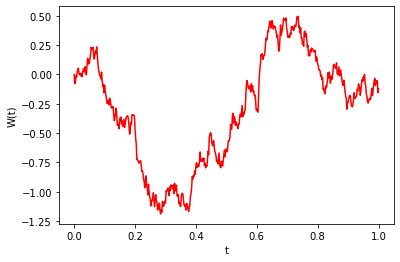

In [12]:
np.random.seed(100)   
T = 1 
N = 500
dt = T/N

dW = np.sqrt(dt)*np.random.normal(size=N)
W = np.cumsum(dW)

plt.plot(np.arange(0,T+dt,dt), np.concatenate([[0],W]),'r-')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()

## bpath3.m

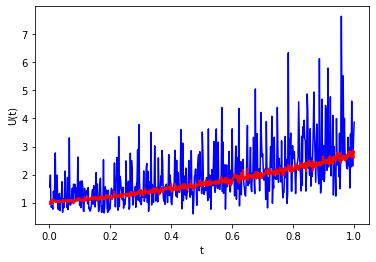

Sample Error is 4.706247100961689


In [13]:
np.random.seed(100)
T = 1 
N = 500
dt = T/N
t = np.arange(dt,1+dt,dt)

M = 1000
dW = np.sqrt(dt)*np.random.normal(size=(M,N))
W = np.cumsum(dW,axis=0)

U = np.exp(np.tile(t,(M,1)) + 0.5 * W)
Umean = np.mean(U,axis=0)
plt.plot(t, Umean, 'b-',label="Mean of 1000 paths")
for _ in range(4):
    plt.plot(t, U[_,:], 'r--', label="5 individual paths")
plt.xlabel('t')
plt.ylabel('U(t)')
plt.show()

averr = np.linalg.norm((Umean - np.exp(9*t/8)), ord=np.inf)
print("Sample Error is {}".format(averr))

## chain.m
Solve SDE for $V(X) = \sqrt{X}$ where $X$ solves 
$$       dX = (\alpha - X) dt + \beta \sqrt{X} dW,   X(0) = Xzero,$$
    with $\alpha = 2, \beta = 1$ and Xzero = 1.
 $X_{em1}$ is Euler-Maruyama solution for X. 
 $X_{em2}$ is Euler-Maruyama solution of SDE for V from Chain Rule.
 Hence, we compare $\sqrt Xem1$ and Xem2.
 
 
 Note: abs is used for safety inside sqrt, but has no effect in this case.

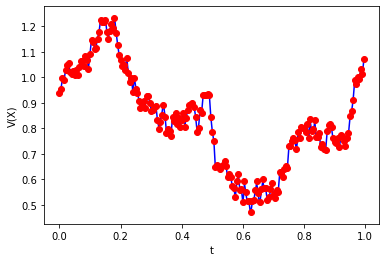

Difference is 0.00920309084760551


In [122]:
np.random.seed(100)
alpha = 2
beta = 1
T = 1 
N = 200
dt = T/N
Xzero = 1
Xzero2 = np.sqrt(Xzero)

Dt = dt
Xem1 = np.zeros(N)
Xem2 = np.zeros(N)
Xtemp1 = Xzero
Xtemp2 = Xzero2

for j in range(N):
    Winc = np.sqrt(dt)*np.random.normal()
    f1 = (alpha - Xtemp1)
    g1 = beta * np.sqrt(abs(Xtemp1))
    
    Xtemp1 += Dt*f1 + Winc * g1
    Xem1[j] = Xtemp1
    
    f2 = (4*alpha - beta**2)/(8*Xtemp2) - Xtemp2/2
    g2 = beta/2
    Xtemp2 += Dt*f2 + Winc*g2
    Xem2[j] = Xtemp2

plt.plot(np.arange(0,T,Dt), np.sqrt(Xem1),'b-',label="Direct Solution")
plt.plot(np.arange(0,T,Dt), Xem2,'ro',label="Solution via Chain Rule")
plt.xlabel("t")
plt.ylabel("V(X)")
plt.show()

Xdiff = np.linalg.norm(np.sqrt(Xem1) - Xem2, np.inf)
print("Difference is {}".format(Xdiff))

## EM.m
SDE is
$$  dX = \lambda X dt + \mu X dW, X(0)=X_0,$$
where $\lambda = 2, \mu=1$ and $X_0 = 1$

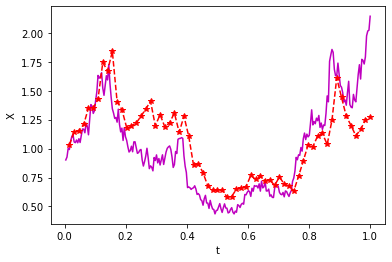

0.8662834386747102


In [6]:
np.random.seed(100)
lamda = 2
mu = 1
Xzero = 1
T = 1
N = 2**8
dt = T/N
dW = np.sqrt(dt)*np.random.normal(size=N)
W = np.cumsum(dW)

Xtrue = Xzero*np.exp((lamda-0.5*mu**2)*(np.arange(dt,T+dt,dt))+mu*W)

plt.plot(np.arange(dt,T+dt,dt), Xtrue,'m-')

R = 4
Dt = R*dt
L = (N//R)
Xem = np.zeros(L)
Xtemp = Xzero
for j  in range(L):
    Winc = np.sum(dW[R*(j-1)+1:R*j])
    Xtemp += Dt * lamda*Xtemp + mu*Xtemp*Winc
    Xem[j] = Xtemp

    
plt.plot(np.arange(Dt,T+Dt,Dt), Xem, 'r--*')
plt.xlabel('t')
plt.ylabel('X')
plt.show()
emerr = np.abs(Xem[-1]-Xtrue[-1])

print(emerr)

### Ex 5.3

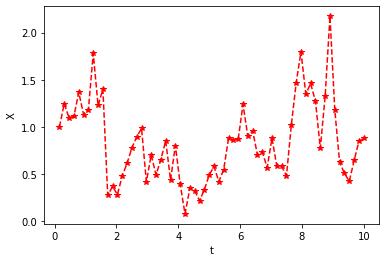

0.8662834386747102


In [10]:
np.random.seed(100)
lamda = 2
mu = 1
Xzero = 1
T = 10
N = 2**8
dt = T/N
dW = np.sqrt(dt)*np.random.normal(size=N)
W = np.cumsum(dW)

# Xtrue = Xzero*np.exp((lamda-0.5*mu**2)*(np.arange(dt,T+dt,dt))+mu*W)

# plt.plot(np.arange(dt,T+dt,dt), Xtrue,'m-')

R = 4
Dt = R*dt
L = (N//R)
Xem = np.zeros(L)
Xtemp = Xzero
for j  in range(L):
    Winc = np.sum(dW[R*(j-1)+1:R*j])
    Xtemp += Dt *lamda*(mu-Xtemp )+ mu*np.sqrt(np.abs(Xtemp))*Winc
    Xem[j] = Xtemp

    
plt.plot(np.arange(Dt,T+Dt,Dt), Xem, 'r--*')
plt.xlabel('t')
plt.ylabel('X')
plt.show()


print(emerr)